<a href="https://colab.research.google.com/github/SantiagoTangarife/HorsesVsHumans/blob/main/Copia_de_Redes_Horse_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neuronales**


In [ ]:
import tensorflow
import tensorflow_datasets as tfds
import tensorflow as tf
import keras
import cv2
import numpy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image



In [ ]:
#from shutil import rmtree
#rmtree("grafs")

In [ ]:
#RECOLECTOR DE BASURA
import gc
gc.collect()

115

In [ ]:
#descargar las imagenes de humanos y caballos
datos, metadatos=tfds.load('horses_or_humans', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteTZ7RSB/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteTZ7RSB/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

,image,label
0,,0 (horses)
1,,0 (horses)
2,,0 (horses)
3,,0 (horses)
4,,0 (horses)

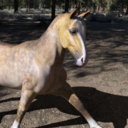
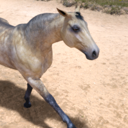
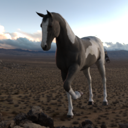
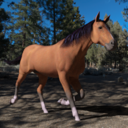
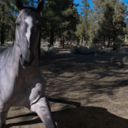

In [ ]:
# ver datos 'train'= los de entrenamiento. con la etiqueta que le corresponde
tfds.as_dataframe(datos['train'].take(5),metadatos)

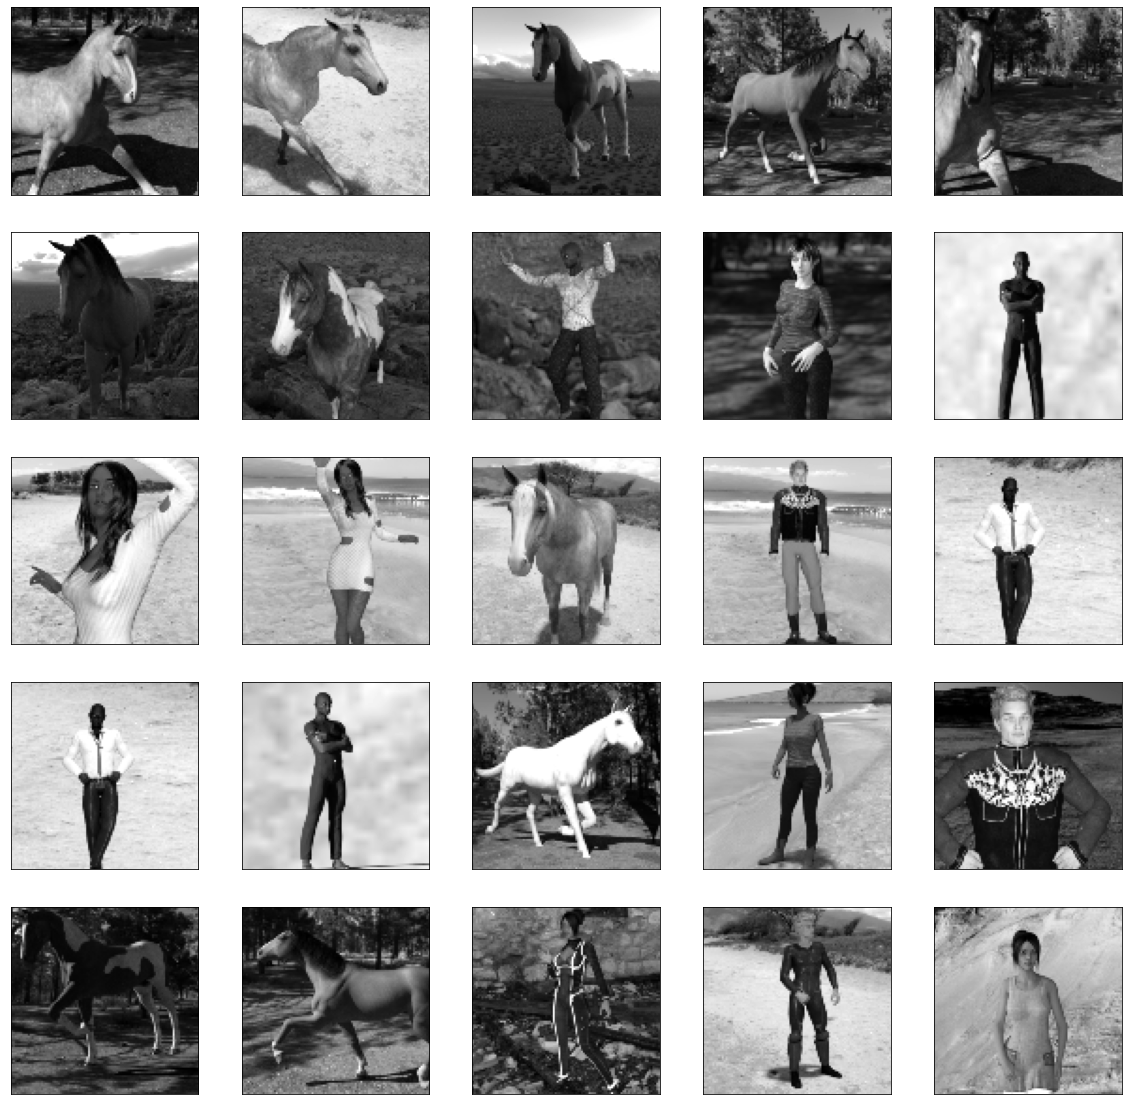

In [ ]:


#para un tamaño fijo en las imagens


#establesco los tamaños mostrados
plt.figure(figsize=(20,20))
#defino el tamaño de la imagen
TAMANO_IMG=100 #EVALUO HASTA QUE LOS OJOS LOS PUEDAN IDENTIFICAR mas pequeño mejor

#itero en los datos y muestro la imagen
for i,(imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen=cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG))
  # 25 imagenes en 5x5
  plt.subplot(5,5,i+1)
  #sin coordenadas cartesianas
  plt.xticks([])
  plt.yticks([])
  #en blanco y negro
  imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  plt.imshow(imagen, cmap='gray')

In [ ]:
datos_entrenamiento=[]

In [ ]:
datos_test=[]

In [ ]:
for i,(imagen, etiqueta)in enumerate(datos['train']): #SOLO LOS DE ENTRENAMIENTO
   imagen=cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG))
   #en blanco y negro
   imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
   imagen=imagen.reshape(TAMANO_IMG,TAMANO_IMG,1)# FORMATO CUADRADO (100,100) EN TAMAÑO Y 1 CANAL DE COLOR(GRIS)
   #agrego las imagenes para enrenar en la lista
   datos_entrenamiento.append([imagen, etiqueta])


In [ ]:
for i,(imagen, etiqueta)in enumerate(datos['test']): #SOLO LOS DE TEST
   imagen=cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG))
   #en blanco y negro
   imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
   imagen=imagen.reshape(TAMANO_IMG,TAMANO_IMG,1)# FORMATO CUADRADO (100,100) EN TAMAÑO Y 1 CANAL DE COLOR(GRIS)
   #agrego las imagenes para TEST en la lista
   datos_test.append([imagen, etiqueta])


In [ ]:
datos_entrenamiento[0]  #NUMPY 0= CABALLO, 1= HUMANO
#LOS VALORES DE LOS PIXELES VAN DE 0 A 255

[array([[[ 46],
         [ 31],
         [ 57],
         ...,
         [ 26],
         [ 24],
         [ 17]],
 
        [[ 49],
         [ 22],
         [ 40],
         ...,
         [ 22],
         [ 18],
         [ 15]],
 
        [[ 61],
         [ 41],
         [ 51],
         ...,
         [ 26],
         [ 16],
         [ 12]],
 
        ...,
 
        [[114],
         [ 73],
         [113],
         ...,
         [ 24],
         [ 33],
         [118]],
 
        [[125],
         [ 91],
         [ 84],
         ...,
         [ 30],
         [127],
         [130]],
 
        [[131],
         [126],
         [101],
         ...,
         [ 90],
         [130],
         [131]]], dtype=uint8), <tf.Tensor: shape=(), dtype=int64, numpy=0>]

In [ ]:
len(datos_entrenamiento)  #1283 de los cuales 1027 son de entrenaminto

1027

In [ ]:
x=[] #pixeles de entrada
y=[] # etiquetas(caballo o humano)

for imagen, etiqueta in datos_entrenamiento:
  x.append(imagen)
  y.append(etiqueta)

In [ ]:
x_t=[] #pixeles de entrada
y_t=[] # etiquetas(caballo o humano)

for imagen, etiqueta in datos_test:
  x_t.append(imagen)
  y_t.append(etiqueta)

In [ ]:
x #sin normalizar

x=np.array(x).astype(float)/255 #maximo de pixeles 0= negro 255=Blanco luminous :v
x #normalizada

array([[[[0.18039216],
         [0.12156863],
         [0.22352941],
         ...,
         [0.10196078],
         [0.09411765],
         [0.06666667]],

        [[0.19215686],
         [0.08627451],
         [0.15686275],
         ...,
         [0.08627451],
         [0.07058824],
         [0.05882353]],

        [[0.23921569],
         [0.16078431],
         [0.2       ],
         ...,
         [0.10196078],
         [0.0627451 ],
         [0.04705882]],

        ...,

        [[0.44705882],
         [0.28627451],
         [0.44313725],
         ...,
         [0.09411765],
         [0.12941176],
         [0.4627451 ]],

        [[0.49019608],
         [0.35686275],
         [0.32941176],
         ...,
         [0.11764706],
         [0.49803922],
         [0.50980392]],

        [[0.51372549],
         [0.49411765],
         [0.39607843],
         ...,
         [0.35294118],
         [0.50980392],
         [0.51372549]]],


       [[[0.8627451 ],
         [0.86666667],
         [0.85

In [ ]:
x_t#sin normalizar

x_t=np.array(x_t).astype(float)/255 #maximo de pixeles 0= negro 255=Blanco luminous :v
x_t #normalizada

array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[1.        ],
         [1.        ],
         [1.  

In [ ]:
y=np.array(y)
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_t=np.array(y_t)
y_t

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
x.shape  #1027 imagenes en formato de 100x100 y en una escala de color

(1027, 100, 100, 1)

# ***Entrenamiento del modelo***

*utilizare aumento de datos porque no tendre imagenes muy estaticas que digamos*

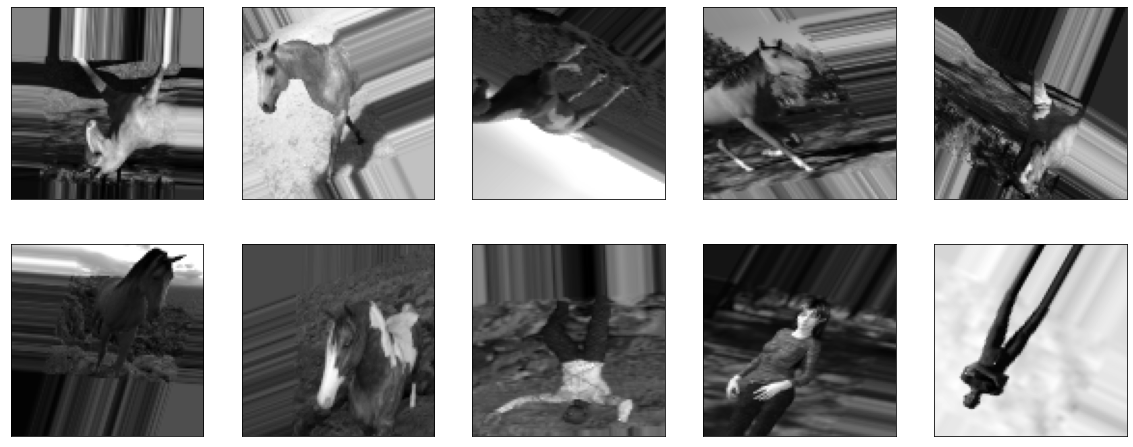

In [ ]:
#para aumento de datos en el entranamirnto
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rotation_range=30,   #rotar las iagenes de matera aleatiroa 50° (deformacion(?))
    width_shift_range=0.3, #mover las  imagenes a los lados
    height_shift_range=0.2, #Arriba o abajo
    shear_range=20,          #se inclina
    zoom_range=[.7,1.5],     #el tamaño oxila entre el 50% y el 150%
    vertical_flip=True,       #deformacion vertical
    horizontal_flip=True    #deformacion horizontal
    
)

datagen.fit(x)    #transforma todas la imagenes de entrenamiento

plt.figure(figsize=(20,8))
for imagen, etiqueta in datagen.flow(x,y,batch_size=10, shuffle=False):    # imprimir transformacion de las 10 primeras en orden(False)
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100,100),cmap='gray')
  break

*MODELOS*  
**uno denso y 2 convolucionales*









In [ ]:
#MODELO DENSO
modeloDenso= tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100,100,1)), #capa de entrada recibiendo 10000 pixeles
  tf.keras.layers.Dense(150,activation='relu'),
  tf.keras.layers.Dense(150,activation='relu'),  #2 capas densas de 150 neuronas cada una, con activacion RELU
  tf.keras.layers.Dense(1,activation='sigmoid')
  # como solo tengo 2 opciones, caballo o humano puedo utilizar la funcion de activacion sofmax o sigmoy ya que esta ultimi oxila entre 0 y 1 justo como la lista *Y*  y puedo utilizar una sola neuromna de salida 
])

#MODELO RED NEURONAL CONBOLUCIONAL
modeloCNN=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #aqui lo que hice due que cree 3 pares de capas convolucioneales y de agrupacion maxima
    #separando por 32,64 y 128 filtros

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    #aqui lo que hice fue crear una capa densa de 150 neuronas y la salida   con sigmoid

])

#MODELO CONVOLUCIONAL PERO CON UN DOPOUR DE 0.2 Y UTILIZARE UNA CAPA DENDA
# DE 250 NEURONAS. VER LO QUE ES UN DROPOUT Y RECORDAR QUE APAGA UN PORCENTAJE DE NEURONAS (-->0.5 AQUI)
modeloCNN2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #aqui lo que hice due que cree 3 pares de capas convolucioneales y de agrupacion maxima
    #paando por 32,64 y 128 filtros
    #dismunuir el dropout
    #utilizar el back normalizacion
    #aumentar capas convulucionale a 5-> 64, 128 y lugo utilizo maxpooling  y batch normalization
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])


In [ ]:
#Compilacion para evaluar posteriornmente
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


#compilo los modelos con el optimizador adam, la funcion de perdida sera 
#BINARY_CROSSENTROPY porque el resultado es BINARIO (humano, caballo), y las 
#metricas de presicion

#OPTIMISADOR ADAM CONSULTAR MEJORA DEL ADAM REDUCIR OXILACION

In [ ]:
from gc import callbacks

In [ ]:
from tensorflow.keras.callbacks import TensorBoard  #para graficar el funcionamiento de los modelos

In [ ]:

data_gen_entrenamiento=datagen.flow(x,y,batch_size=32)

In [ ]:
tensorboardDenso=TensorBoard(log_dir='grafs/denso')
modeloDenso.fit(data_gen_entrenamiento,batch_size=32,#para entrenar el modelo, le mando la X que los las imagenes, Y que son las etiquetas  y le doy un tamaño de lote
                validation_data=(x_t,y_t),# las imagenes son de entrenamiento 
                steps_per_epoch=int(np.ceil(len(x)/float(32))),
                validation_steps=int(np.ceil(len(x_t)/float(32))),
                epochs=100,
                callbacks=[tensorboardDenso])

Epoch 1/100
33/33 [==============================] - 4s 34ms/step - loss: 1.2225 - accuracy: 0.5463 - val_loss: 0.6827 - val_accuracy: 0.4922
Epoch 2/100
33/33 [==============================] - 1s 29ms/step - loss: 0.7469 - accuracy: 0.5492 - val_loss: 1.9393 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - 1s 29ms/step - loss: 0.7825 - accuracy: 0.5287 - val_loss: 0.6170 - val_accuracy: 0.6289
Epoch 4/100
33/33 [==============================] - 1s 29ms/step - loss: 0.7959 - accuracy: 0.5501 - val_loss: 0.6902 - val_accuracy: 0.5547
Epoch 5/100
33/33 [==============================] - 1s 29ms/step - loss: 0.6956 - accuracy: 0.5725 - val_loss: 0.6111 - val_accuracy: 0.5273
Epoch 6/100
33/33 [==============================] - 1s 29ms/step - loss: 0.6976 - accuracy: 0.5686 - val_loss: 0.6162 - val_accuracy: 0.5156
Epoch 7/100
33/33 [==============================] - 1s 28ms/step - loss: 0.6862 - accuracy: 0.5881 - val_loss: 0.5951 - val_accuracy: 0.7500
Epoch 

In [ ]:
tensorboardCNN=TensorBoard(log_dir='grafs/cnn')
modeloCNN.fit(data_gen_entrenamiento,batch_size=32,#para entrenar el modelo, le mando la X que los las imagenes, Y que son las etiquetas  y le doy un tamaño de lote
                validation_data=(x_t,y_t),# las imagenes son de validacion
                steps_per_epoch=int(np.ceil(len(x)/float(32))),
                validation_steps=int(np.ceil(len(x_t)/float(32))),
                epochs=100,
                callbacks=[tensorboardCNN])

Epoch 1/100
33/33 [==============================] - 10s 41ms/step - loss: 0.7043 - accuracy: 0.5170 - val_loss: 0.6906 - val_accuracy: 0.5508
Epoch 2/100
33/33 [==============================] - 1s 34ms/step - loss: 0.6893 - accuracy: 0.5511 - val_loss: 0.6764 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - 1s 36ms/step - loss: 0.6875 - accuracy: 0.5511 - val_loss: 0.6644 - val_accuracy: 0.8438
Epoch 4/100
33/33 [==============================] - 1s 34ms/step - loss: 0.6769 - accuracy: 0.5930 - val_loss: 0.6684 - val_accuracy: 0.5195
Epoch 5/100
33/33 [==============================] - 1s 35ms/step - loss: 0.6150 - accuracy: 0.6826 - val_loss: 0.7854 - val_accuracy: 0.6875
Epoch 6/100
33/33 [==============================] - 1s 34ms/step - loss: 0.5888 - accuracy: 0.6923 - val_loss: 2.2287 - val_accuracy: 0.5312
Epoch 7/100
33/33 [==============================] - 1s 35ms/step - loss: 0.5405 - accuracy: 0.7283 - val_loss: 3.3969 - val_accuracy: 0.5234
Epoch

In [ ]:
tensorboardCNN2=TensorBoard(log_dir='grafs/cnn2')
modeloCNN2.fit(data_gen_entrenamiento,batch_size=32,#para entrenar el modelo, le mando la X que los las imagenes, Y que son las etiquetas  y le doy un tamaño de lote
                validation_data=(x_t,y_t),# las imagenes son de entrenamiento 
                steps_per_epoch=int(np.ceil(len(x)/float(32))),
                validation_steps=int(np.ceil(len(x_t)/float(32))),
                epochs=100,
                callbacks=[tensorboardCNN2])

Epoch 1/100
33/33 [==============================] - 2s 39ms/step - loss: 0.7022 - accuracy: 0.4810 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - 1s 36ms/step - loss: 0.6871 - accuracy: 0.5560 - val_loss: 0.5870 - val_accuracy: 0.8828
Epoch 3/100
33/33 [==============================] - 1s 35ms/step - loss: 0.6621 - accuracy: 0.6095 - val_loss: 0.7625 - val_accuracy: 0.5117
Epoch 4/100
33/33 [==============================] - 1s 34ms/step - loss: 0.6263 - accuracy: 0.6553 - val_loss: 1.8255 - val_accuracy: 0.5234
Epoch 5/100
33/33 [==============================] - 1s 35ms/step - loss: 0.6065 - accuracy: 0.6699 - val_loss: 1.4645 - val_accuracy: 0.6484
Epoch 6/100
33/33 [==============================] - 1s 35ms/step - loss: 0.5730 - accuracy: 0.6943 - val_loss: 2.7386 - val_accuracy: 0.5469
Epoch 7/100
33/33 [==============================] - 1s 35ms/step - loss: 0.5492 - accuracy: 0.7030 - val_loss: 4.2886 - val_accuracy: 0.5156
Epoch 

***visualisacion de los modelos***

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir grafs/

segun las graficas de los modelos el mas apto es el **modelo** **denso**, pare este caso, ya que el la grafica de precicion el set de entrenamiento asciende, y el set de pruebas sufre una pequeña caida, pero asciende tambien, y en la grafica de perdida tanto el set de pruebas como el de entrenamiento, disminuyen con base el sistema avanza

In [ ]:
##AQUI GUARDO EL MODELO MATEMATICO DE LAS 3 UTILIZANDO JOBLIB--> MIRAR MODELO FENOMENOLOGICO APROX 4 LINEAS, FORMATO JLIB
##EN EL INFORME ADJUNTAR EL ENLACE DE GITHUB CON EL MODELO  MATEMATICO
dump(modeloDenso, 'Modelo_Denso.joblib')
dump(modeloCNN, 'Modelo_Convolucional.joblib')
dump(modeloCNN2, 'Modelo_Convolucional_DropOut_0.2.joblib')

In [ ]:
modeloDenso.save('humanos-caballos-denso.h5') #guardo el mejor modelo

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 40 kB 6.5 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras humanos-caballos-denso.h5 carpeta_salida